# Import Libraries and Dataset

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

%matplotlib inline

In [2]:
# Loading Dataset

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

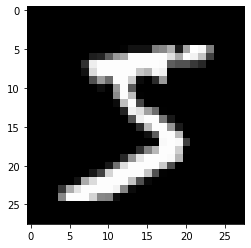

In [4]:
# Visulaizing image

plt.imshow(X_train[0], cmap='gray')

In [5]:
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (60000, 28, 28)
y_train:  (60000,)
X_test:  (10000, 28, 28)
y_test:  (10000,)


# Data Visualization

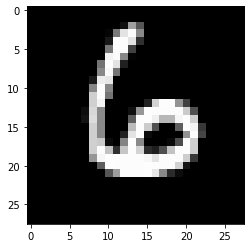

In [9]:
sample_number = random.randint(1,6000)
plt.imshow(X_train[sample_number], cmap='gray')

In [10]:
#Corresponding label
print(y_train[sample_number])

6


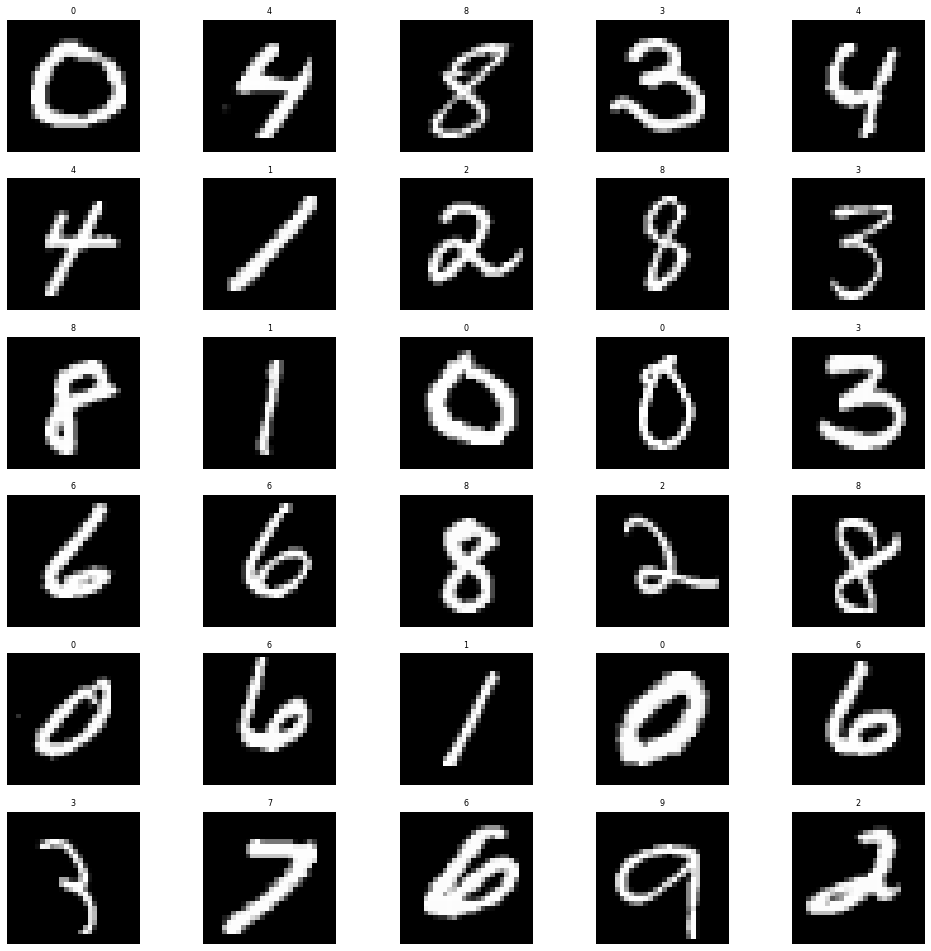

In [14]:
grid_rows = 6
grid_columns = 5

fig, axes = plt.subplots(grid_rows,grid_columns, figsize=(17,17))
axes = axes.ravel()   # to convert 6 x 5 matrix into 30 array

for i in range(0, grid_rows*grid_columns):
    index = np.random.randint(0, len(X_train))
    axes[i].imshow(X_train[index], cmap='gray')
    axes[i].set_title(y_train[index], fontsize =8)
    axes[i].axis('off')

# Data Preprocessing

In [15]:
# Normalizing the data

X_train = X_train / 255
X_test = X_test / 255

In [18]:
# Adding Noise on train_data
noise_factor = 0.3

noise_dataset = []

for img in X_train:
    noisy_image = img + noise_factor * np.random.randn(*img.shape)
    noisy_image = np.clip(noisy_image, 0, 1)   # since image is normalized
    noise_dataset.append(noisy_image)

In [26]:
noise_dataset =np.array(noise_dataset)

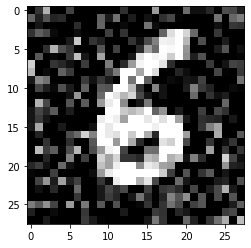

In [21]:
# Noisy Image
plt.imshow(noise_dataset[672], cmap='gray')

In [30]:
# Adding noise in test data
noise_factor = 0.1

noise_dataset_test = []

for img in X_test:
    noisy_image = img + noise_factor * np.random.randn(*img.shape)
    noisy_image = np.clip(noisy_image, 0, 1)   # since image is normalized
    noise_dataset_test.append(noisy_image)

In [31]:
noise_dataset_test =np.array(noise_dataset_test)

# Building the Model

In [25]:
autoencoder = tf.keras.models.Sequential()

# encoder
autoencoder.add(tf.keras.layers.Conv2D(filters = 16, kernel_size =3 , strides= 2, padding = 'same', input_shape =( 28,28,1)))
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size =3 , strides= 2, padding = 'same'))
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size =3 , strides= 1, padding = 'same'))

# decoder
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 16, kernel_size =3 , strides= 2, padding = 'same'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 1, kernel_size =3 , strides= 2, activation ='sigmoid', padding = 'same'))

autoencoder.compile(loss = 'binary_crossentropy', optimizer =tf.keras.optimizers.Adam(lr = 0.001))
autoencoder.summary()

# we check whether output shape of last layer matches the input shape or not

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose_4 (Conv2DTr (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_5 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [32]:
autoencoder.fit(noise_dataset.reshape(-1,28,28,1),
                X_train.reshape(-1,28,28,1),
                epochs = 10,
                batch_size = 200,
                validation_data = (noise_dataset_test.reshape(-1, 28,28,1), X_test.reshape(-1,28,28,1))
               )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 41s 690us/sample - loss: 0.2638 - val_loss: 0.0988
Epoch 2/10
60000/60000 [==============================] - 24s 396us/sample - loss: 0.1016 - val_loss: 0.0822
Epoch 3/10
60000/60000 [==============================] - 23s 380us/sample - loss: 0.0933 - val_loss: 0.0775
Epoch 4/10
60000/60000 [==============================] - 23s 386us/sample - loss: 0.0905 - val_loss: 0.0757
Epoch 5/10
60000/60000 [==============================] - 23s 387us/sample - loss: 0.0893 - val_loss: 0.0745
Epoch 6/10
60000/60000 [==============================] - 23s 390us/sample - loss: 0.0885 - val_loss: 0.0738
Epoch 7/10
60000/60000 [==============================] - 23s 391us/sample - loss: 0.0879 - val_loss: 0.0734
Epoch 8/10
60000/60000 [==============================] - 23s 389us/sample - loss: 0.0874 - val_loss: 0.0728
Epoch 9/10
60000/60000 [==============================] - 24s 394us/sample - l

# Evaluation and Result visualization

In [35]:
evaluation = autoencoder.evaluate(noise_dataset_test.reshape(-1,28,28,1), X_test.reshape(-1,28,28,1))
print('Test Accuracy: ', evaluation)

10000/10000 [==============================] - 2s 209us/sample - loss: 0.0722
Test Accuracy:  0.07221584268808365


In [37]:
prediction_size = 10
predicted = autoencoder.predict(noise_dataset_test[:prediction_size].reshape(-1,28,28,1))

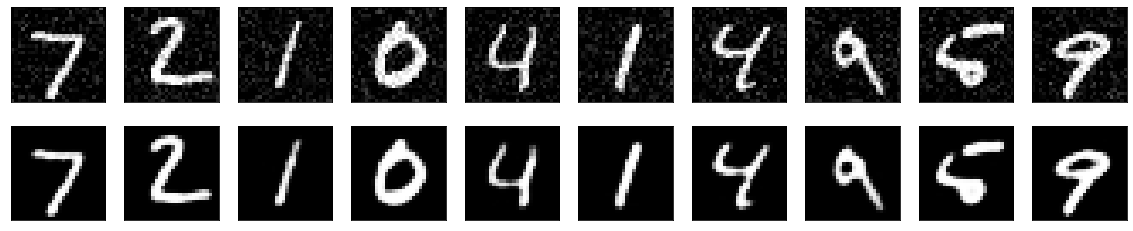

In [39]:
fig, axes = plt.subplots(nrows=2,ncols=10, sharex = True, sharey = True, figsize=(20,4))
for images, row in zip([noise_dataset_test[:prediction_size], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28,28)), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
fig.savefig('result.png')